# Meat Consumption - EDA 

This data exploration will show the trends between the different types of meat consumption, allowing us to observe the trends of the demands of the meat types. Through this analysis, we aim to understand the correlation and trends that occur with meat consumption and can provide various stakeholders insights in the food industry and aid in making better decision making processes in meat production and supply.

Content:
This dataset has 5 columns:
- Location: The country code name
- Subject: The type of meat
- Time: The year the data was recovered
- Measure: The type of measurement 
- Value: Value according to the measure column

Questions to Answer:
- Which type of meat was most consumed in the world?
- Which year had the most meat consumption?
- What is the most consumed meat in Indonesia?
- How is Indonesia's meat consumption compared to with the rest of the world?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory data analysis

In [2]:
df = pd.read_csv("Data/meat_consumption.csv")
# Changing tonnes to kg
df.loc[df["MEASURE"] == "THND_TONNE", "Value"] = df["Value"] * 1000

df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


In [4]:
df.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.857227e+06
std,10.600740,9.386537e+06
min,1990.000000,1.669000e-09
25%,1999.000000,4.063539e+00
50%,2008.000000,6.579143e+01
75%,2017.000000,2.967790e+05
max,2026.000000,1.316073e+08


Next, we want to get the different locations in the dataset.

In [5]:
df["LOCATION"].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'HTI', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'MYS', 'MOZ', 'NGA',
       'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA',
       'THA', 'UKR', 'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS',
       'EU28', 'NOR', 'CHE'], dtype=object)

In [6]:
df.isnull().sum()

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Which type of meat was most consumed in the world?

In [8]:
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [9]:
global_mc = df.groupby(["LOCATION","SUBJECT"])["Value"].sum().reset_index()
global_mc.head()

,LOCATION,SUBJECT,Value
0,ARG,BEEF,9.092339e+07
1,ARG,PIG,1.294603e+07
2,ARG,POULTRY,4.887714e+07
3,ARG,SHEEP,2.224558e+06
4,AUS,BEEF,2.635333e+07


In [10]:
global_mc_bar = global_mc.sort_values("Value", ascending = False)
global_mc_bar.head()

,LOCATION,SUBJECT,Value
181,WLD,PIG,3.570178e+09
182,WLD,POULTRY,3.258152e+09
17,BRICS,PIG,1.843963e+09
180,WLD,BEEF,1.813843e+09
33,CHN,PIG,1.700177e+09


<AxesSubplot:xlabel='LOCATION', ylabel='Value'>

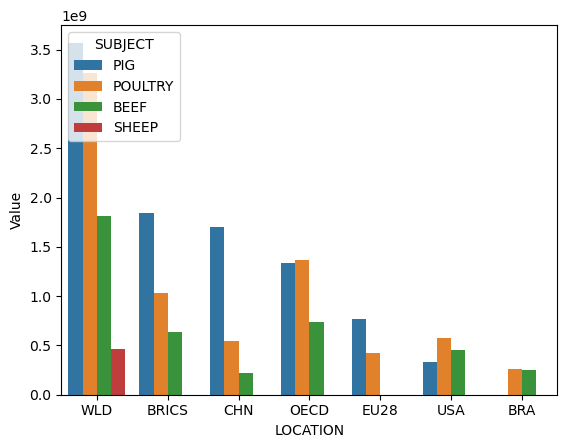

In [11]:
sns.barplot(data = global_mc_bar.head(20), x = "LOCATION", y = "Value", hue = "SUBJECT")

Initially, we can see that the type of meat most consumed in the world is PIG followed by poultry, beef then sheep. We can see that countries such as BRICS, China, USA and Brazil are also leading in total meat consumption in the world.

([<matplotlib.patches.Wedge at 0x7fd9c9a856a0>,
 [Text(-0.6693924925700266, 0.8728766756483342, 'BEEF'),
  Text(-0.6350678353567397, -1.0181791809378666, 'PIG'),
  Text(1.0748103254410402, 0.23405718174267898, 'POULTRY'),
  Text(0.17276784149334326, 1.1874979043963536, 'SHEEP')],
 [Text(-0.36512317776546904, 0.4761145503536367, '20.8%'),
  Text(-0.3704562372914315, -0.5939378555470889, '40.6%'),
  Text(0.5862601775132945, 0.12766755367782487, '34.0%'),
  Text(0.1007812408711169, 0.6927071108978728, '4.6%')])

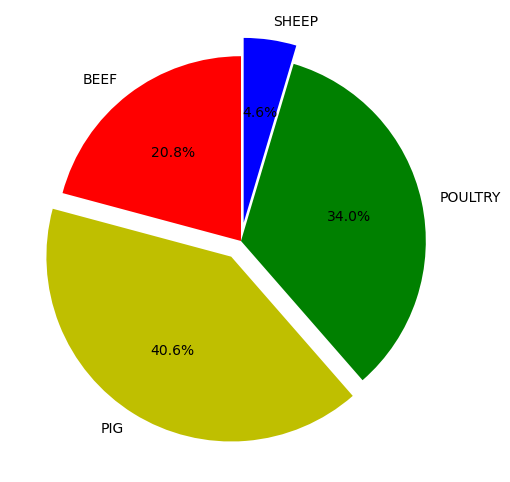

In [12]:
type_subject = global_mc.groupby("SUBJECT")["Value"].sum()
colors = ['r', 'y','g', 'b']

plt.figure(figsize = (6,6))

plt.pie(type_subject, labels = type_subject.index, colors = colors, startangle = 90,autopct = "%1.1f%%", explode = (0,0.1,0,0.1))

With the pie chart, we can clearly observe that the most consumed meat is Pig with 40.6% of the total meat consumed. Followed by poultry (34.0%), beef (20.8%) and lastly sheep (4.6%).

## Which year had the most meat consumption?

In [13]:
year_df = df.groupby(['TIME','SUBJECT'])['Value'].sum().reset_index()
year_df.head()

,TIME,SUBJECT,Value
0,1990,BEEF,3.541553e+07
1,1990,PIG,6.172027e+07
2,1990,POULTRY,5.417584e+07
3,1990,SHEEP,1.075460e+07
4,1991,BEEF,3.714596e+07


[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Value (kg)')]

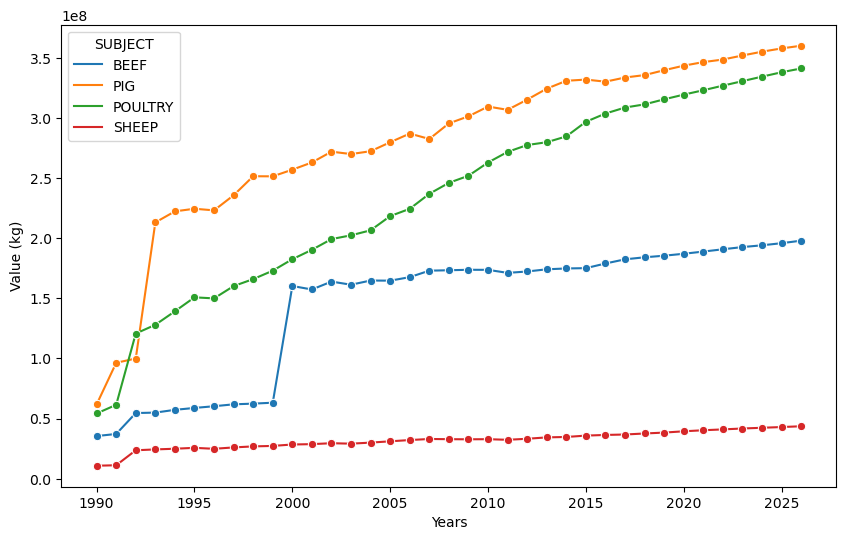

In [25]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = year_df, x = "TIME", y = "Value", hue = "SUBJECT", marker = "o", dashes = False)
ax.set(xlabel = "Years", ylabel = "Value (kg)")

The overall trend is that meat consumption has increased over the years as the world's population has generally increased as well. We can initially see a huge increase of meat consumption for poultry and pig in 1990-1995. Following that, poultry has also exponentially increased having 600% increase in consumption. In addition, there was an increase of 300% for beef in the year 2000. 

## Meat Consumption in Indonesia

As Indonesia is a muslim-dominated country, with 87% of the population adhereing towards the muslim religion, there would be little to no consumption of pig as it goes against their religious beliefs.

In adddition, factors such as urbinzation, evolving lifestyles and rising incomes leads to an increase in meat consumption.Indonesian cuisine itself has numerous dishes centered around beef, poultry and sheep. Beef is usually used to make meat-based dishes such as rendang, poultry is used in mostly satay due to its accessability and suistainability and sheep is mostly used for religious purposes.

Pork is only consumed in areas where non-muslim individuals tend to stay at. 

Thus, Indonesia's meat consumption is deeply correlated with their religious practices, culinary heritage and economic standing. Sheep, poultry and beef is mostly consumed while pork is not due to religion.

In [15]:
idn_df = df[(df['LOCATION'] == 'IDN') & (df['TIME'] <= 2023)]
idn_df

,LOCATION,SUBJECT,MEASURE,TIME,Value
2942,IDN,BEEF,KG_CAP,1990,1.180576
2943,IDN,BEEF,KG_CAP,1991,1.190587
2944,IDN,BEEF,KG_CAP,1992,1.293658
2945,IDN,BEEF,KG_CAP,1993,1.477944
2946,IDN,BEEF,KG_CAP,1994,1.414871
...,...,...,...,...,...
13312,IDN,SHEEP,THND_TONNE,2019,125707.218226
13313,IDN,SHEEP,THND_TONNE,2020,128507.021668
13314,IDN,SHEEP,THND_TONNE,2021,131434.793636
13315,IDN,SHEEP,THND_TONNE,2022,134412.142275


In [16]:
idn_df.isnull().sum()

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64

In [17]:
idn_df.loc[idn_df["MEASURE"] == "THND_TONNE", "Value"] = idn_df["Value"] * 1000

meat_types = idn_df['SUBJECT'].unique()
total_consumption = []

for meat_type in meat_types:
    total = idn_df[idn_df["SUBJECT"] == meat_type]["Value"].sum()
    total_consumption.append(total)
total_consumption

[18107799636.91138, 22097528180.11088, 46839814519.156876, 3860637277.452437]

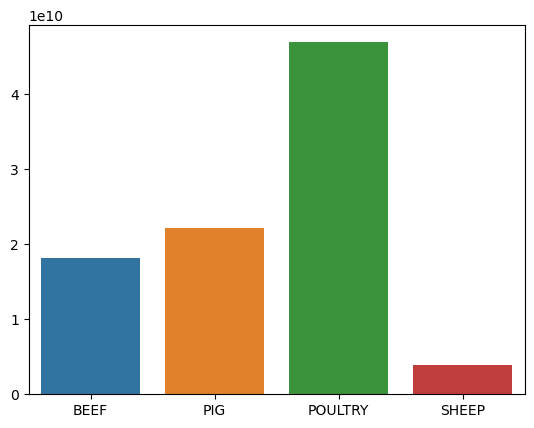

In [18]:
ax = sns.barplot(data = idn_df, x = meat_types, y = total_consumption)

([<matplotlib.patches.Wedge at 0x7fd9a89ecc40>,
 [Text(-0.6443056494964895, 0.8915549506490933, 'BEEF'),
  Text(-1.0834249449247553, -0.5159364192560857, 'PIG'),
  Text(1.045955019277385, -0.3405555720414003, 'POULTRY'),
  Text(0.15962783830540767, 1.1893355091133633, 'SHEEP')],
 [Text(-0.35143944517990333, 0.4863027003540508, '19.9%'),
  Text(-0.6319978845394405, -0.30096291123271657, '24.3%'),
  Text(0.5705209196058463, -0.1857575847498547, '51.5%'),
  Text(0.09311623901148779, 0.6937790469827951, '4.2%')])

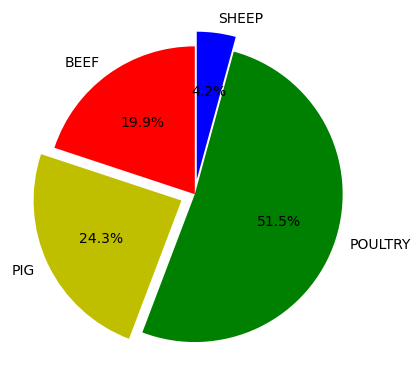

In [19]:
plt.pie(total_consumption, labels = meat_types, colors = colors, startangle = 90,autopct = "%1.1f%%", explode = (0,0.1,0,0.1))

From this, we can see that Poultry has the highest consumption with 51.5% and suprisingly, pig is the second highest with 24.3% of meat consumed in total despite the dominant majority of people in Indonesia being muslims. Beef comes in third with 19.9% while sheep is last with 4.2%.

## How is Indonesia's meat consumption compared to with the rest of the world?

In [20]:
idn_df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
2942,IDN,BEEF,KG_CAP,1990,1.180576
2943,IDN,BEEF,KG_CAP,1991,1.190587
2944,IDN,BEEF,KG_CAP,1992,1.293658
2945,IDN,BEEF,KG_CAP,1993,1.477944
2946,IDN,BEEF,KG_CAP,1994,1.414871


In [21]:
time_idn = idn_df.groupby(["TIME","SUBJECT"])["Value"].sum().unstack()
time_idn.head()

SUBJECT,BEEF,PIG,POULTRY,SHEEP
TIME,,,,
1990,3.060000e+08,5.460000e+08,5.090000e+08,9.000000e+07
1991,3.140000e+08,5.750000e+08,5.840000e+08,9.400000e+07
1992,3.470000e+08,5.860000e+08,5.480000e+08,1.000000e+08
1993,4.030000e+08,6.230000e+08,6.990000e+08,1.120000e+08
1994,3.920000e+08,6.610000e+08,8.160000e+08,1.000000e+08


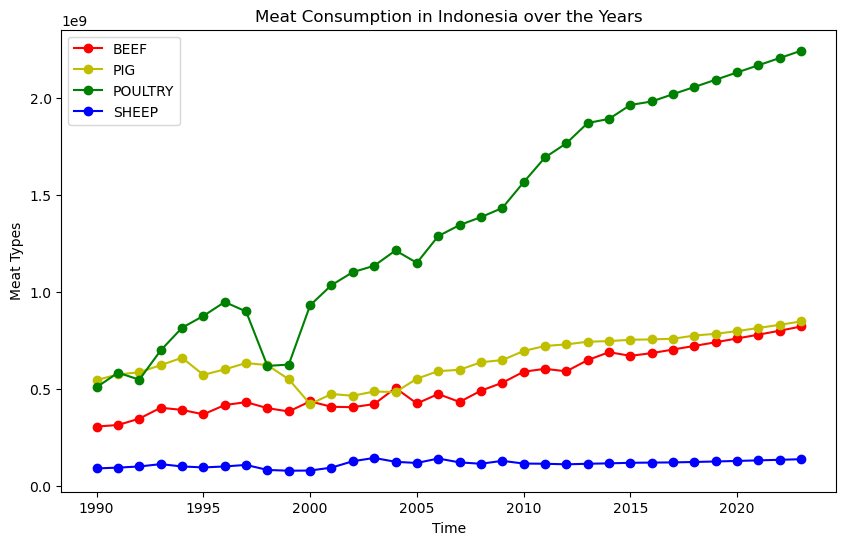

In [22]:
plt.figure(figsize = (10,6))

for i, column in enumerate(time_idn.columns):
    plt.plot(time_idn.index, time_idn[column], marker = 'o', color = colors[i])

plt.xlabel("Time", fontsize = 10)
plt.ylabel("Meat Types", fontsize = 10)
plt.title("Meat Consumption in Indonesia over the Years", fontsize = 12)
plt.legend(time_idn.columns, fontsize = 10)
plt.show()

In [26]:
# dataset without Indonesia
df_widn = df[(df['LOCATION'] != "IDN") & (df["TIME"] <= 2023)]
loc_values = df_widn["LOCATION"].unique


time_global = df_widn.groupby(["TIME","SUBJECT"])["Value"].sum().unstack()
time_global

SUBJECT,BEEF,PIG,POULTRY,SHEEP
TIME,,,,
1990,3.510953e+07,6.117427e+07,5.366684e+07,1.066460e+07
1991,3.683196e+07,9.572383e+07,6.081127e+07,1.104858e+07
1992,5.418978e+07,9.928527e+07,1.200787e+08,2.348803e+07
1993,5.449982e+07,2.123694e+08,1.271866e+08,2.419764e+07
1994,5.681476e+07,2.215276e+08,1.383068e+08,2.476940e+07
1995,5.841863e+07,2.237844e+08,1.498326e+08,2.552929e+07
1996,5.978506e+07,2.224095e+08,1.489043e+08,2.471538e+07
1997,6.135297e+07,2.349195e+08,1.591687e+08,2.586018e+07
1998,6.195835e+07,2.507496e+08,1.652448e+08,2.673738e+07


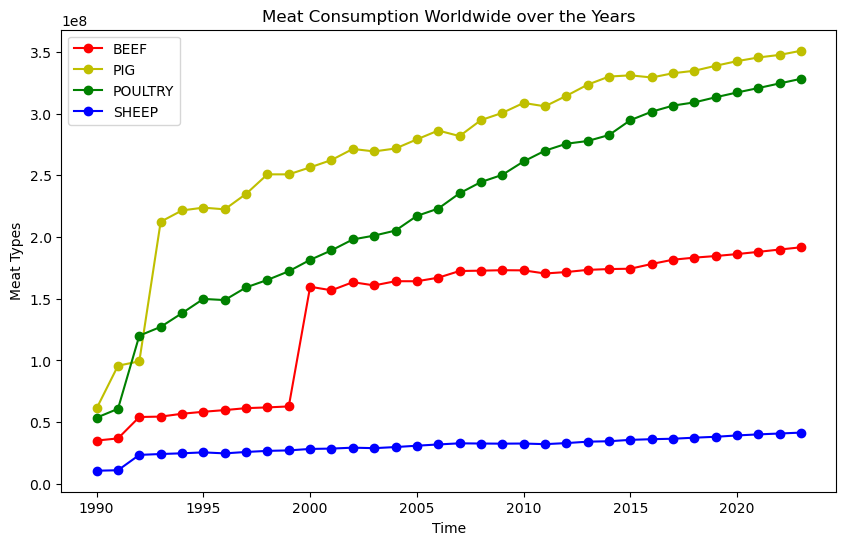

In [27]:
plt.figure(figsize = (10,6))

for i, column in enumerate(time_global.columns):
    plt.plot(time_global.index, time_global[column], marker = 'o', color = colors[i])

plt.xlabel("Time", fontsize = 10)
plt.ylabel("Meat Types", fontsize = 10)
plt.title("Meat Consumption Worldwide over the Years", fontsize = 12)
plt.legend(time_global.columns, fontsize = 10)
plt.show()

In both lineplots, suprisingly, sheep has the least consumption over time. It is also seen that all four types of meat has increased in the amount of meat consumption throughout the years. However, in the case of Indonesia, poultry is the highest consumed meat in the country while worldwide, pig seems the most popular after 1995. 

Consumption of pig and beef in Indonesia increases throughout the years, however, their values have always stayed pretty similiar to each other. On the other hand, worldwide, Pig consumption has always been higher than beef and on recent years, pig consumption is doubled than beef.

## Results

This EDA has revealed numerous insights:
- Countries that have the highest meat consumption are China, USA, Brazil.
- Most consumed meat in the world currently is Pig followed by poultry, beef and finally sheep.
- In Indonesia, the most consumed meat is poultry followed by pig, beef and finally sheep. Suprisingly, pig was consumed more than beef and sheep even though the population is muslim-dominated.
- Consumption of poultry is highest in Indonesia while worldwide, pig is the most consumed type of meat. Sheep is consumed the least in both worlwide and Indonesia.